<a href="https://colab.research.google.com/github/lcbjrrr/fiap-bdt-ml/blob/master/Projeto_Final_Erros_Setoriais_(Flytour).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJETO FINAL
###MATÉRIA: BIG DATA MINING & INTELIGÊNCIA ARTIFICIAL
###PROFESSOR: LUIZ CARLOS BARBOZA JUNIOR
###ALUNO: BRUNO GALVÃO RIBEIRO / RM: 334917


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Tratando os dados para gerar uma planilha com os colaboradores que possuem ou não possuem ERROS SETORIAIS.

In [0]:
import pandas as pd
import numpy as np

DadosColaboradores =  pd.read_csv('/content/drive/My Drive/PROJ/PROJETO FINAL/BaseColab4.csv', sep=';')
ErrosSetoriais =  pd.read_csv('/content/drive/My Drive/PROJ/PROJETO FINAL/OcorrenciasErros.csv', sep=';')

#DadosColaboradores.head()
#ErrosSetoriais.head()

#Tabela com os colaboradores com erros setoriais

ErrosColab  = ErrosSetoriais.pivot_table(values=["id_ocorrencias"], index=["id_colaborador"], aggfunc=np.count_nonzero)
ErrosColab = ErrosColab.fillna(0)
ErrosColab = ErrosColab.sort_values(['id_ocorrencias'], ascending=False)
#ErrosColab

result = pd.merge(DadosColaboradores,ErrosColab, how='left', on="id_colaborador")
result=result.fillna(0)

#Criando a coluna para identificar se o colaborador possui ou não erros setoriais.
def funcPossuiErros(x):
  x
  if(x == 0):
    return 0.0
  else:
    return 1.0

reg=len(result)
reg
result['PossuiErros']=0
i=0

for i in range(1,reg,1):
     result['PossuiErros'][i] = funcPossuiErros(result['id_ocorrencias'][i])

result.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id_filial,nm_filial,id_colaborador,Dt Admissao,Dt Nacimento,Idade,Tempo de Casa,Cep,Bairro,id_cidade,Cidade,id_funcao,Função,id_cargo,Cargo,sal,id_ocorrencias,PossuiErros
0,6,SAO,101221,02/05/2016,13/01/1997,23,3,6700146,JARDIM ELEONOR,17,COTIA,2,OPERACIONAL,4,ASSISTENTE ADMINISTRATIVO,1706.98,0.0,0
1,6,SAO,1010004,05/08/1998,22/08/1978,41,21,2754080,JD MARIA LUIZA,66,SÃO PAULO,2,OPERACIONAL,17,LIDER,5576.68,17.0,1
2,6,SAO,1010007,21/09/1998,01/07/1966,53,21,6413010,VILA ESPERANÇA,4,BARUERI,2,OPERACIONAL,6,CONSULTOR,4266.75,9.0,1
3,6,SAO,1010034,01/07/1999,06/09/1980,39,19,12140000,JD. BRASIL,66,SÃO PAULO,2,OPERACIONAL,6,CONSULTOR,4506.72,3.0,1
4,6,SAO,1010042,01/10/1999,22/07/1979,40,20,12140000,JD. STO. ANTONIO,66,SÃO PAULO,2,OPERACIONAL,6,CONSULTOR,4619.39,7.0,1


### APLICANDO O ALGORÍTMO DE KNN PARA IDENTIFICAÇÃO DOS COLABORADORES QUE POSSUEM OU NÃO ERROS SETORIAIS.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

#Separando a amostra de treino (70% dos dados)

n_treino = (len(result)/3)*2
n_treino
treino_dados = result[:int(n_treino)]
treino_dados

,id_filial,nm_filial,id_colaborador,Dt Admissao,Dt Nacimento,Idade,Tempo de Casa,Cep,Bairro,id_cidade,Cidade,id_funcao,Função,id_cargo,Cargo,sal,id_ocorrencias,PossuiErros
0,6,SAO,101221,02/05/2016,13/01/1997,23,3,6700146,JARDIM ELEONOR,17,COTIA,2,OPERACIONAL,4,ASSISTENTE ADMINISTRATIVO,1706.98,0.0,0
1,6,SAO,1010004,05/08/1998,22/08/1978,41,21,2754080,JD MARIA LUIZA,66,SÃO PAULO,2,OPERACIONAL,17,LIDER,5576.68,17.0,1
2,6,SAO,1010007,21/09/1998,01/07/1966,53,21,6413010,VILA ESPERANÇA,4,BARUERI,2,OPERACIONAL,6,CONSULTOR,4266.75,9.0,1
3,6,SAO,1010034,01/07/1999,06/09/1980,39,19,12140000,JD. BRASIL,66,SÃO PAULO,2,OPERACIONAL,6,CONSULTOR,4506.72,3.0,1
4,6,SAO,1010042,01/10/1999,22/07/1979,40,20,12140000,JD. STO. ANTONIO,66,SÃO PAULO,2,OPERACIONAL,6,CONSULTOR,4619.39,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,6,SAO,1019144,04/02/2019,21/12/1992,27,0,9950000,VILA NOGUEIRA,18,DIADEMA,1,ADM/FIN/SUP,2,ANALISTA,1841.31,0.0,0
792,6,SAO,1019145,04/02/2019,07/10/1988,31,0,5203340,VILA FANTON,66,SÃO PAULO,1,ADM/FIN/SUP,2,ANALISTA,1841.31,0.0,0
793,6,SAO,1019146,01/10/2013,29/08/1981,38,6,5821181,PQ SANTO ANTONIO,66,SÃO PAULO,1,ADM/FIN/SUP,6,CONSULTOR,3333.33,0.0,0
794,6,SAO,1019148,01/10/2013,29/08/1981,38,6,5821182,PQ SANTO ANTONIO,66,SÃO PAULO,1,ADM/FIN/SUP,6,CONSULTOR,1100.00,0.0,0


In [0]:
#Separando a amostra de teste (30% dos dados)

n_teste = len(result)-n_treino
teste_dados = result[-int(n_teste):]
teste_dados

,id_filial,nm_filial,id_colaborador,Dt Admissao,Dt Nacimento,Idade,Tempo de Casa,Cep,Bairro,id_cidade,Cidade,id_funcao,Função,id_cargo,Cargo,sal,id_ocorrencias,PossuiErros
797,6,SAO,1019154,01/10/2013,29/08/1981,38,6,5821185,PQ SANTO ANTONIO,66,SÃO PAULO,1,ADM/FIN/SUP,6,CONSULTOR,3003.26,0.0,0
798,6,SAO,1019155,01/10/2013,29/08/1981,38,6,5821186,PQ SANTO ANTONIO,66,SÃO PAULO,1,ADM/FIN/SUP,6,CONSULTOR,1709.27,0.0,0
799,6,SAO,1019156,01/10/2013,29/08/1981,38,6,5821175,PQ SANTO ANTONIO,66,SÃO PAULO,1,ADM/FIN/SUP,6,CONSULTOR,2321.44,0.0,0
800,6,SAO,1019157,01/10/2013,29/08/1981,38,6,5821176,PQ SANTO ANTONIO,66,SÃO PAULO,1,ADM/FIN/SUP,6,CONSULTOR,2062.14,0.0,0
801,6,SAO,1019158,01/10/2013,29/08/1981,38,6,5821177,PQ SANTO ANTONIO,66,SÃO PAULO,1,ADM/FIN/SUP,6,CONSULTOR,4832.39,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,5,RIO,6719929,01/03/2001,09/07/1962,57,16,24240660,SANTA ROSA,53,RIO DE JANEIRO,2,OPERACIONAL,1,AGENTE DE AEROPORTO,2799.50,0.0,0
1191,5,RIO,6721087,06/08/2001,27/04/1959,60,15,21920280,ILHA GOVERNADOR,53,RIO DE JANEIRO,2,OPERACIONAL,1,AGENTE DE AEROPORTO,2691.31,0.0,0
1192,5,RIO,6725279,22/12/2003,15/05/1968,51,15,24445000,CENTRO,62,SÃO GONÇALO,2,OPERACIONAL,6,CONSULTOR,3677.64,1.0,1
1193,6,SAO,6725724,17/02/2004,30/09/1976,43,15,4674200,JD.MARAJOARA,66,SÃO PAULO,2,OPERACIONAL,6,CONSULTOR,3799.55,6.0,1


In [0]:
kviz = KNeighborsClassifier(n_neighbors=5)
kviz.fit(treino_dados[['id_filial','Idade',	'Tempo de Casa',	'id_cidade', 'id_funcao','id_cargo','sal']] , treino_dados['PossuiErros'] )

previsoes = kviz.predict(teste_dados[['id_filial','Idade',	'Tempo de Casa',	'id_cidade', 'id_funcao','id_cargo','sal']])
previsoes

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [0]:
Precision = pd.crosstab(teste_dados['PossuiErros'], previsoes)
Precision

col_0,0,1
PossuiErros,,
0,81,70
1,70,177


ANÁLISE: De acordo com os dados exibidos, identifiquei uma precisão de 65%, de acordo com a análise do négocio da empresa, deveriamos aplicar um treinamento específicos nos 68 colaboradores, que não erraram mas possuem o perfil para errar e identificar o motivo dos colaboradores que erraram porém não foram traçados no perfil.

### APLICANDO O ALGORÍTMO K MEANS PARA IDENTIFICAR OS GRUPOS DE COLABORADORES QUE ERRAM DE ACORDO COM O SALÁRIO.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


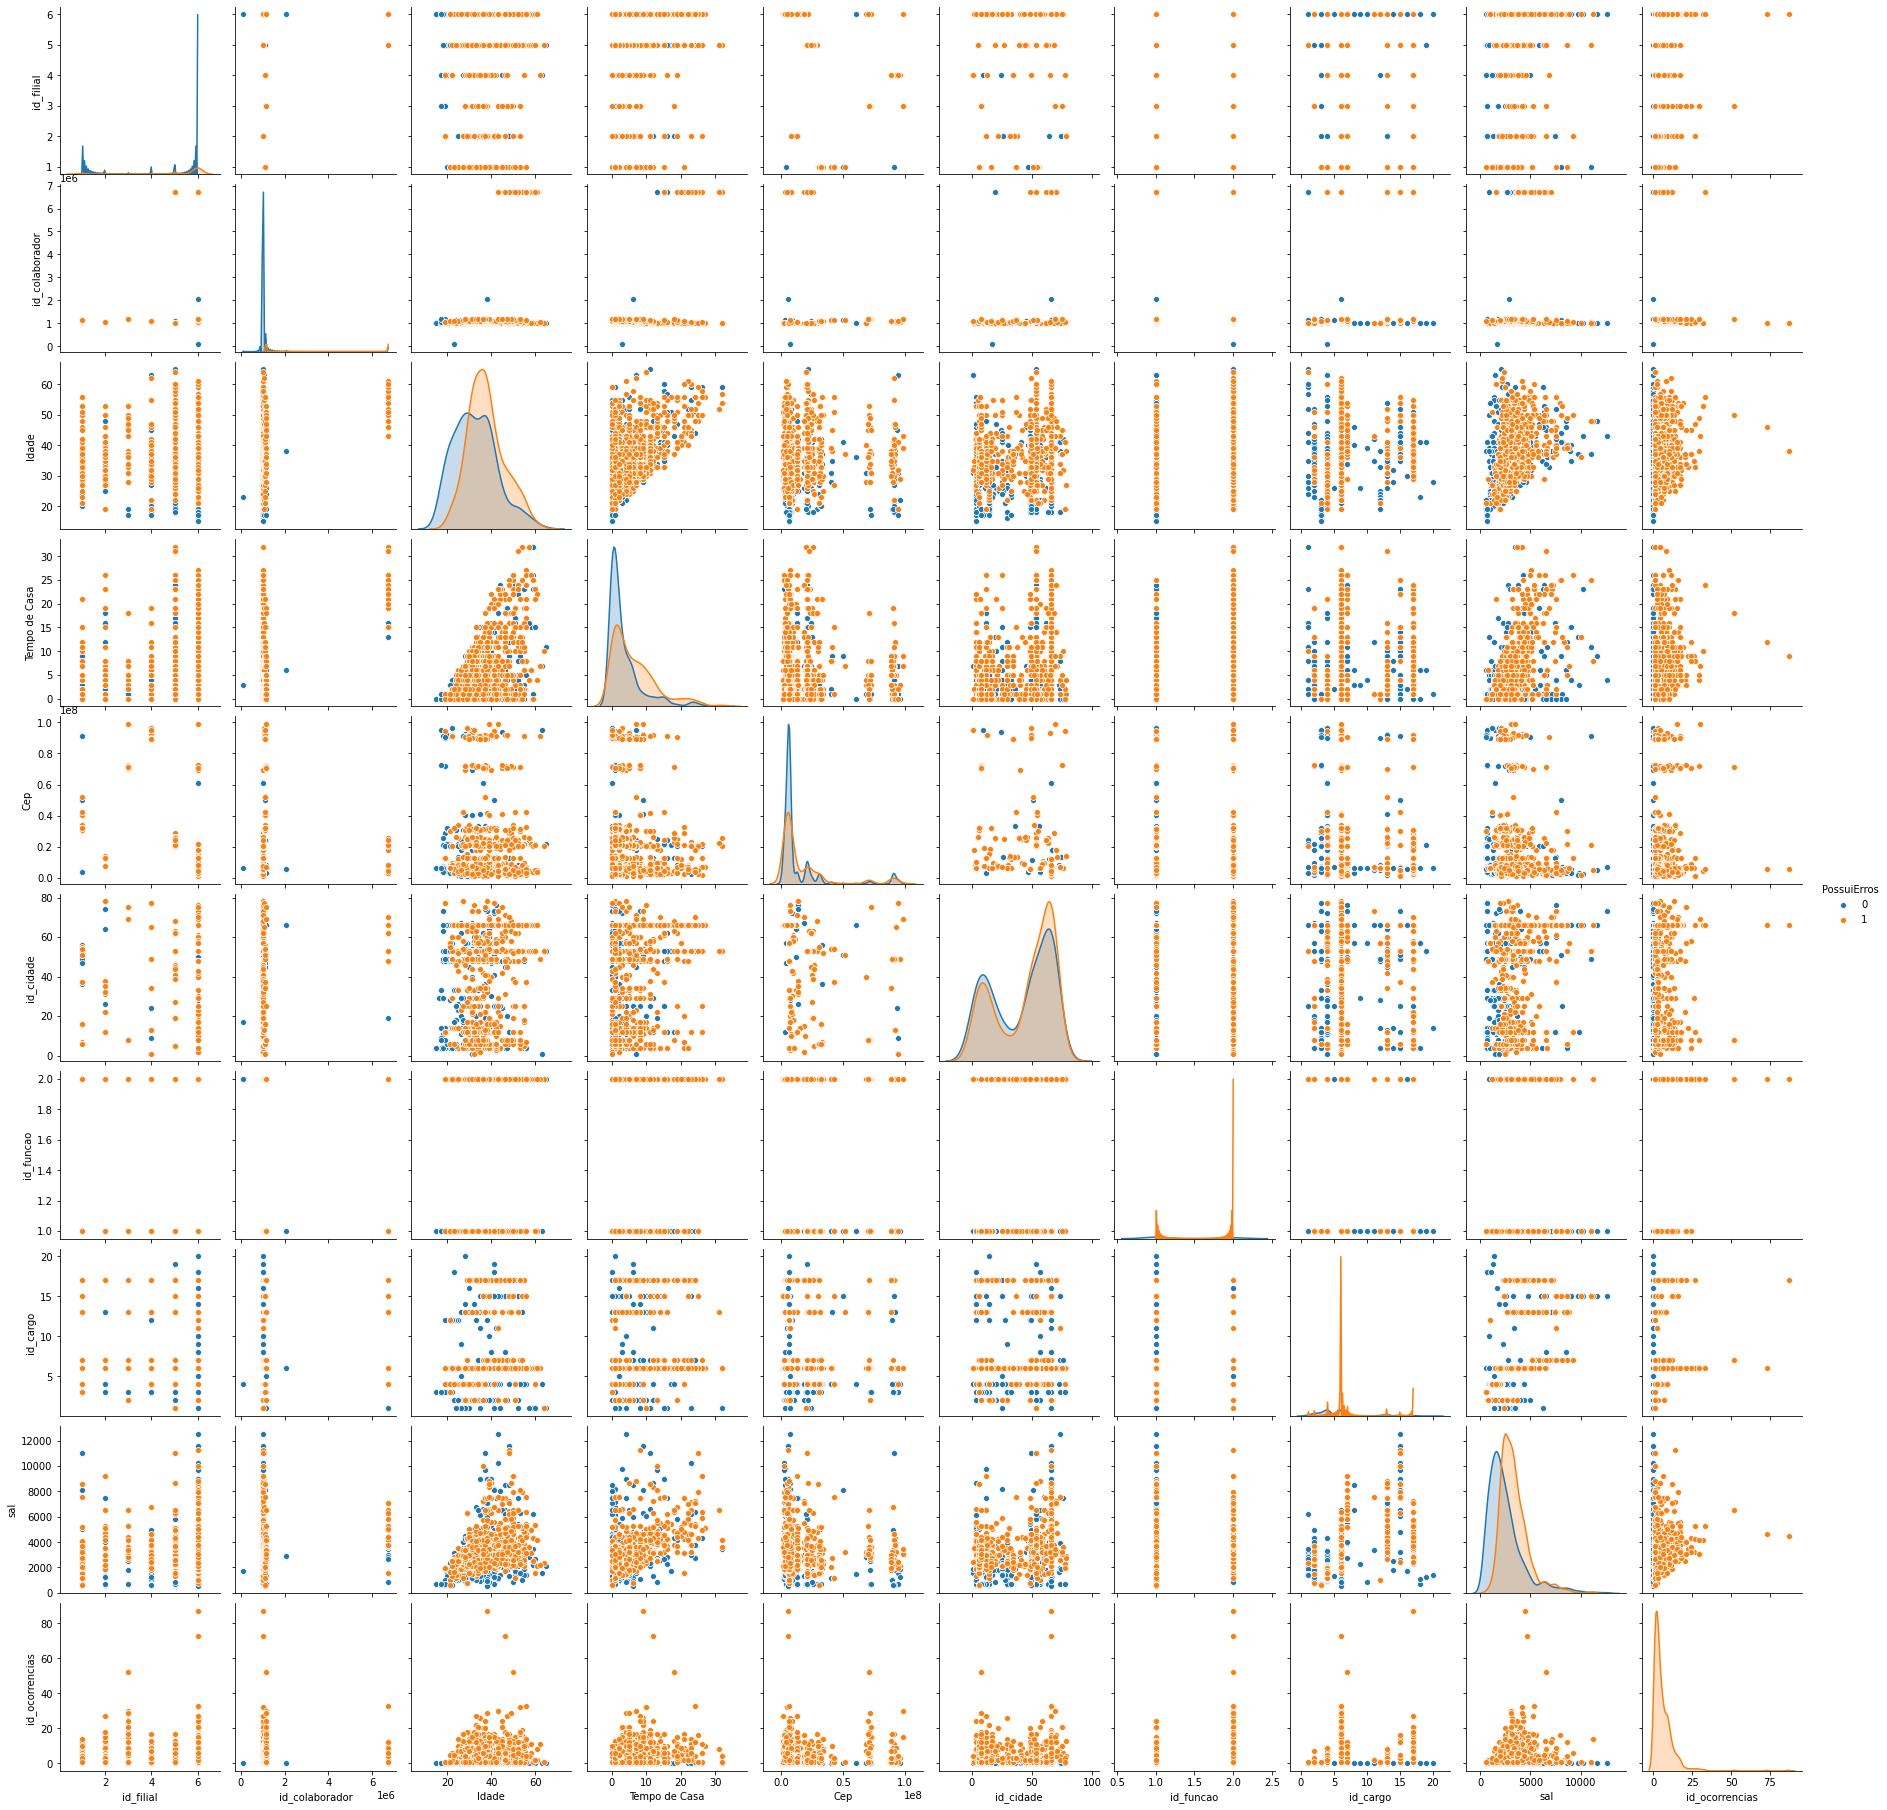

In [0]:
sns.pairplot(result, hue="PossuiErros")

In [0]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=5)
k.fit(result[['sal','id_ocorrencias']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

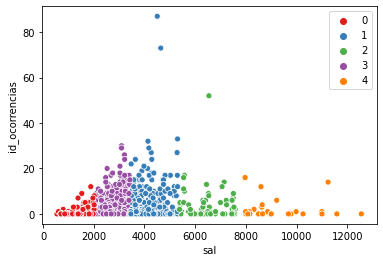

In [0]:
import seaborn as sns
sns.scatterplot(result['sal'], result['id_ocorrencias'], hue=k.labels_, palette=sns.color_palette('Set1',5))

ANÁLISE: De acordo com os dados identificamos que 2 dos 5 grupos gerados com a faixa salarial entre 2000 à 5000 reais possuem a maior quantidade de erros.
